<a href="https://colab.research.google.com/github/Hengameh1392/Hengameh-Hadian/blob/main/First_Stat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy.stats import mode, iqr, t, probplot, ttest_1samp
import statistics
from scipy.stats import binom, poisson, norm
import matplotlib.pyplot as plt
# use seaborn plotting style defaults
import seaborn as sns; sns.set()
import pandas as pd

In [3]:
X = np.array([10, 10, 6, 12, 6, 9, 16, 20, 11, 10, 11, 11, 9, 12, 11])
#X = np.array([23, 4, 29, 44, 47, 24, 40, 23, 23, 44, 33, 27, 60, 46, 61, 11, 23, 62, 31, 44, 77, 14, 65, 42])
#X = np.array([99, 85, 86, 71, 82, 95, 108, 87, 89, 89, 78, 86])
#X = np.array([12, 12, 12, 14, 15, 16, 16, 16, 16, 17, 17, 18, 18, 18, 19, 19, 20, 20, 20, 20, 
#              20, 20, 20, 20, 21, 21, 21, 22, 22, 23, 23, 23, 24, 24, 25, 26, 26, 28, 28, 28])			  
#X = np.random.poisson(35, 15)



In [4]:
#sample range, mean and mode
R = np.ptp(X)  #sample range: ptp (peak to peak)
Xbar = np.mean(X) #sample mean
Q2 = np.median(X) #sample median
print('R={0:.2f}, Xbar={1:.2f}, Q2={2:.2f}'.format(R, Xbar, Q2))
M = mode(X) #sample mode
print(M)
print("The mode is {} with a count of {}".format(M.mode[0], M.count[0]))

#Quartiles
Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)
IQR = iqr(X) #interquantile_range = Q3-Q1
print('Q1 = {0:.2f}, Q3 = {1:.2f}, IQR = {2:.2f}'.format(Q1, Q3, IQR))

#Variance and standard deviation
var = np.var(X, ddof=1) #sample variance
s = np.std(X, ddof=1) #sample standard deviation
print('var = {0:.2f}, s = {1:.2f}'.format(var, s))

R=14.00, Xbar=10.93, Q2=11.00
ModeResult(mode=array([11]), count=array([4]))
The mode is 11 with a count of 4
Q1 = 9.50, Q3 = 11.50, IQR = 2.00
var = 12.07, s = 3.47


In [ ]:
#Python version 3.8
#statistics.quantiles(X, *, n=4, method='exclusive')  

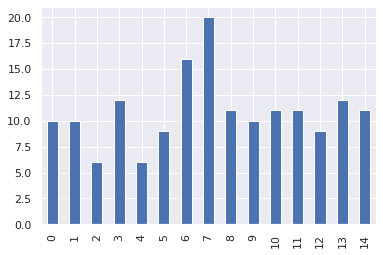

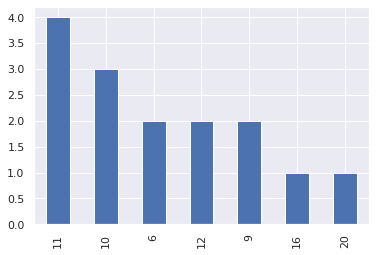

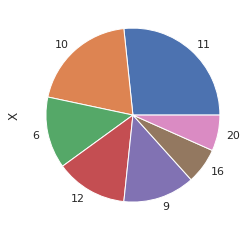

In [5]:
df = pd.DataFrame(X,columns=['X'])
df['X'].value_counts() #generate counts
df['X'].plot.bar()
plt.figure()
df['X'].value_counts().plot.bar()
plt.figure()
df['X'].value_counts().plot.pie()

((array([-1.69372899, -1.22918025, -0.93620006, -0.70737068, -0.51078428,
         -0.33229293, -0.1638693 ,  0.        ,  0.1638693 ,  0.33229293,
          0.51078428,  0.70737068,  0.93620006,  1.22918025,  1.69372899]),
  array([ 6,  6,  9,  9, 10, 10, 10, 11, 11, 11, 11, 12, 12, 16, 20])),
 (3.4073330073418986, 10.933333333333334, 0.9197556394051722))

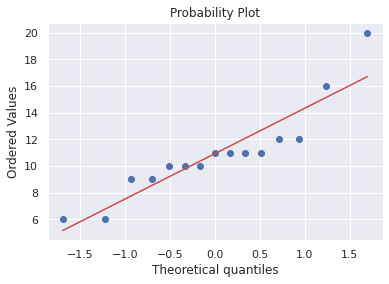

In [8]:
probplot(X, plot=plt)

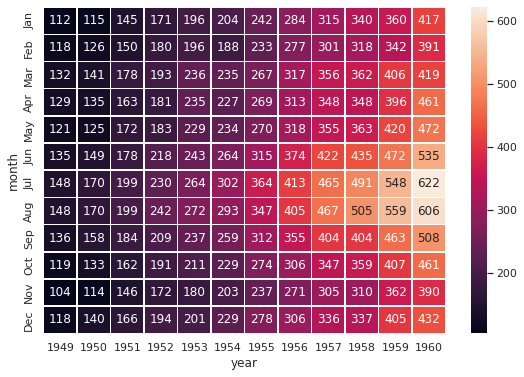

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Load the example flights dataset and convert to long-form
flights_long = sns.load_dataset("flights")
flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(flights, annot=True, fmt="d", linewidths=.5, ax=ax)

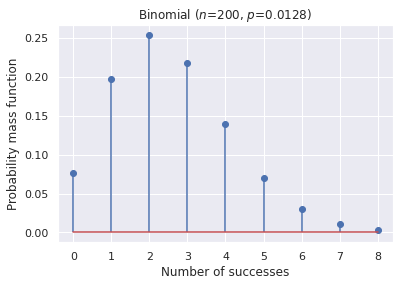

In [14]:

#Binomial parameters n and p
n, p = 200, 0.0128
# x = np.arange(0, n) # entire range not practical
# Instead chose range within some probability threshold
x = np.arange(binom.ppf(0.001, n, p), binom.ppf(0.999, n, p))
plt.figure()
plt.stem(x, binom.pmf(x, n, p), use_line_collection=True)
plt.title('Binomial ($n$={0}, $p$={1})'.format(n, p))
plt.xlabel('Number of successes')
plt.ylabel('Probability mass function')
plt.show()



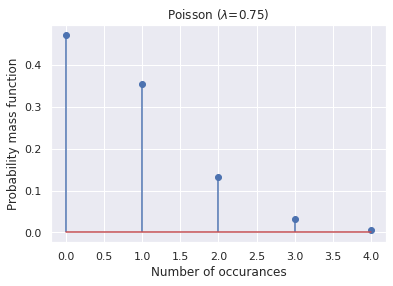

In [15]:
lamda = 0.75
x = np.arange(poisson.ppf(0.01, lamda), poisson.ppf(0.999, lamda))
plt.figure()
plt.stem(x, poisson.pmf(x, lamda), use_line_collection=True)
plt.title('Poisson ($\lambda$={0})'.format(lamda))
plt.xlabel('Number of occurances')
plt.ylabel('Probability mass function')
#plt.autoscale(enable=True, axis='y', tight=True)
plt.show()

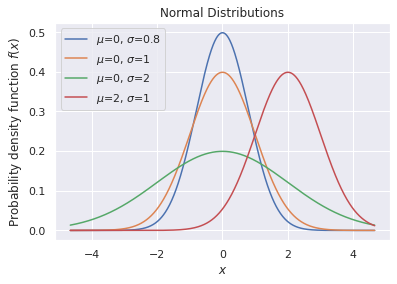

In [16]:
mu_sigmas = [(0, 0.8), (0, 1), (0, 2), (2, 1)]
x = np.linspace(norm.ppf(0.01, 0, 2), norm.ppf(0.99, 0, 2), 1000)
plt.figure()
for mu, sigma in mu_sigmas:
    plt.plot(x, norm.pdf(x, mu, sigma), 
             label=('$\\mu$={0}, $\\sigma$={1}'.format(mu, sigma)))
    plt.title('Normal Distributions')
    plt.xlabel('$x$')
    plt.ylabel('Probability density function $f(x)$')
plt.legend()
#plt.autoscale(enable=True, axis='both', tight=True)
plt.show()

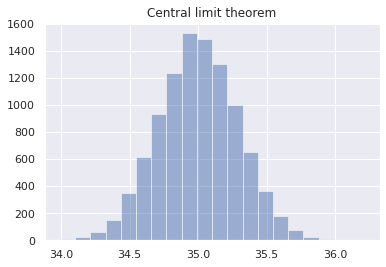

In [17]:
N = 10000
sim = np.zeros(N)
for i in range(N):
    sim[i] = np.mean(np.random.uniform(30, 40, 100))
plt.figure()
plt.hist(sim, bins=20, alpha=0.5)	
plt.title('Central limit theorem')
plt.show()